Done. You have the matrices PP QQ  RR  SS  WW.
  
Done. You have the matrices "Response" and "Response_named" 
which contain the models simulated reponses to
given values for the exogenous stochastic processes.
  
  
Here are the UNFILTERED SIMULATED series.
Total Simulation Length =  500
Number of Initial Values Discarded =  100
  
  
Trend and cycle components have been computed.
The matrices Mat_trend, Mat_trend_named,
Mat_cycle, Mat_cycle_named can be downloaded
to excel or used to make plots.
  
Detrending Filter Used:  Hodrick-Prescott
  
  
Simulated Series, Trend Component, Cyclical Comoponent
x-axis: time periods,  y-axis:  %-deviation from steady state
  


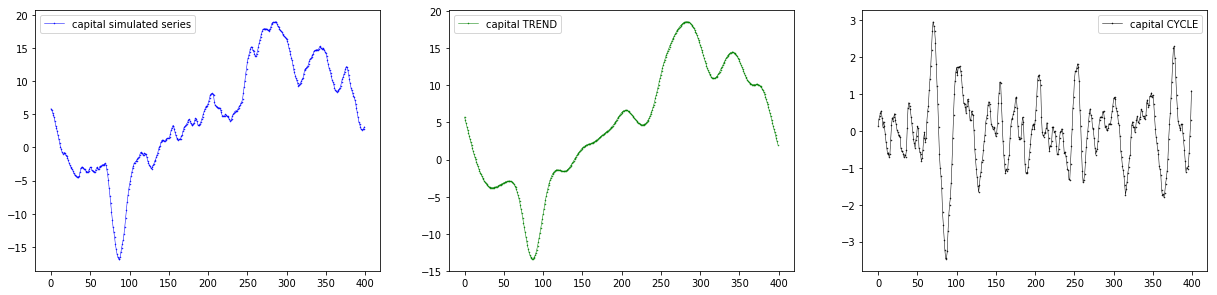

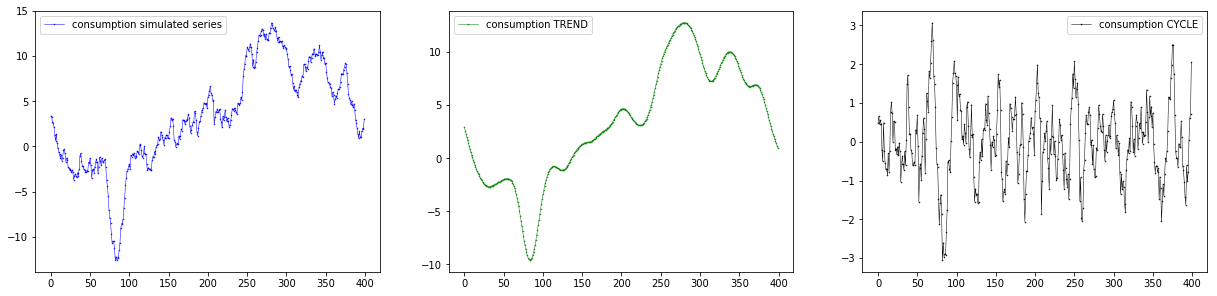

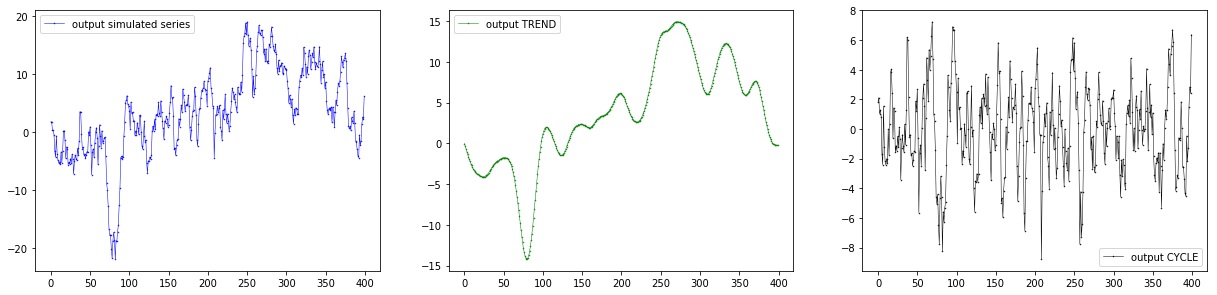

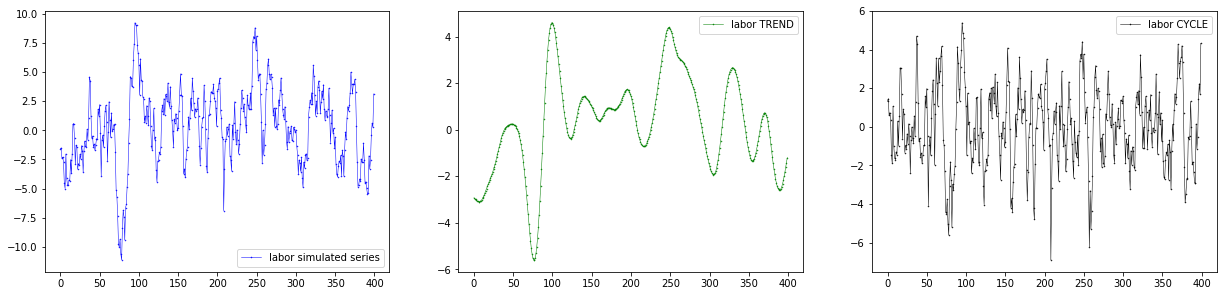

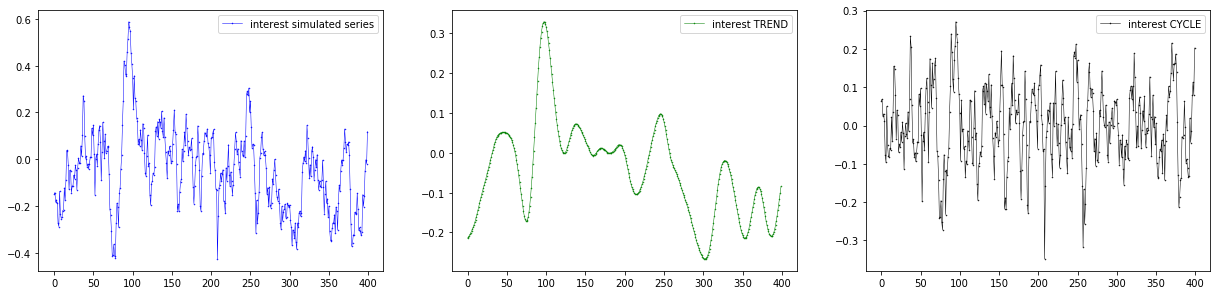

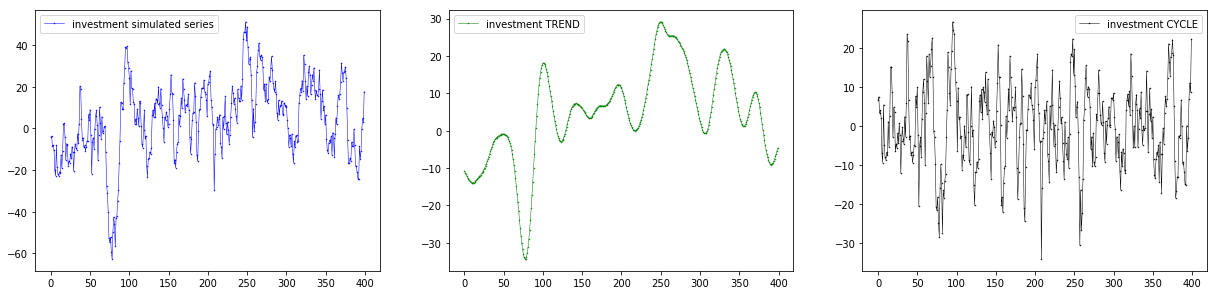

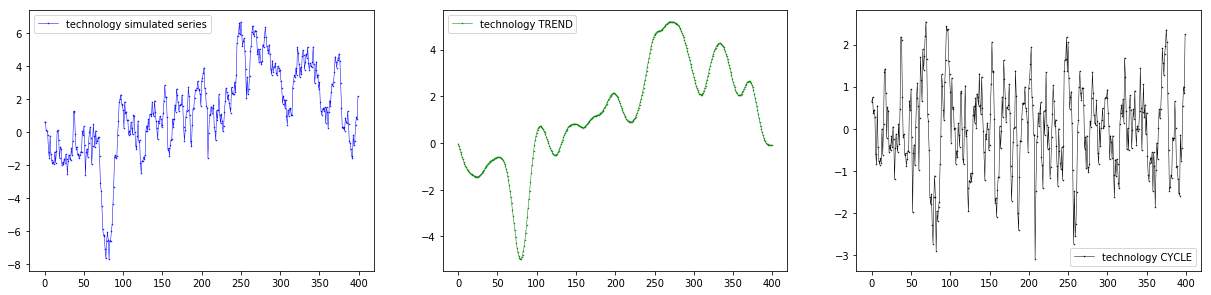

  
  
Shocks used in simulation
  


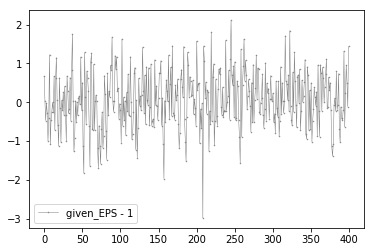

   
   
  
  
  
Here are the moments for the simulated series.
You can also dowload these in tables Mom_Table_01 to _04.
  
  
 
Table 01:  Mean, Standard Deviation, Coefficient of Variation
 


,Mean,Std Deviation,Coeff of Variation
capital,-1.53e-14,9.63e-01,-6.28e+13
consumption,3.16e-15,9.79e-01,3.10e+14
output,2.16e-14,2.90e+00,1.34e+14
labor,6.55e-14,2.08e+00,3.18e+13
interest,2.45e-15,1.02e-01,4.18e+13
investment,1.16e-13,1.05e+01,9.03e+13
technology,2.28e-14,1.02e+00,4.48e+13


 
 
 
Table 02:  Cross Correlation with Output, Standard Deviation Relative to Output
 


,Correlation with GDP,Std Dev Relative to GDP
capital,3.89e-01,3.32e-01
consumption,8.88e-01,3.37e-01
output,1.00e+00,1.00e+00
labor,9.76e-01,7.17e-01
interest,9.46e-01,3.52e-02
investment,9.88e-01,3.62e+00
technology,1.00e+00,3.52e-01


 
 
  
Table 03:  Autocorrelations  t + Leads  t=0  t - Lags  (Not Cross Correlations)
 


,capital,consumption,output,labor,interest,investment,technology
6,2.65e-01,6.97e-02,-6.80e-02,-8.93e-02,-8.71e-02,-8.68e-02,-6.85e-02
5,4.24e-01,1.85e-01,1.58e-02,-1.06e-02,-8.00e-03,-7.41e-03,1.51e-02
4,5.85e-01,3.33e-01,1.56e-01,1.28e-01,1.31e-01,1.31e-01,1.55e-01
3,7.36e-01,4.99e-01,3.31e-01,3.04e-01,3.06e-01,3.07e-01,3.30e-01
2,8.66e-01,6.59e-01,5.11e-01,4.88e-01,4.90e-01,4.90e-01,5.10e-01
1,9.60e-01,8.32e-01,7.42e-01,7.28e-01,7.29e-01,7.29e-01,7.42e-01
0,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00
-1,9.60e-01,8.32e-01,7.42e-01,7.28e-01,7.29e-01,7.29e-01,7.42e-01
-2,8.66e-01,6.59e-01,5.11e-01,4.88e-01,4.90e-01,4.90e-01,5.10e-01
-3,7.36e-01,4.99e-01,3.31e-01,3.04e-01,3.06e-01,3.07e-01,3.30e-01


 
 
  
Table 04:  Cross Correlations with Output  t + Leads  t=0  t - Lags
 


,capital,consumption,output,labor,interest,investment,technology
6,-4.76e-01,-2.85e-01,-6.80e-02,3.92e-02,9.38e-02,9.79e-03,-6.63e-02
5,-4.39e-01,-2.08e-01,1.58e-02,1.20e-01,1.71e-01,9.16e-02,1.74e-02
4,-3.65e-01,-7.37e-02,1.56e-01,2.52e-01,2.97e-01,2.26e-01,1.57e-01
3,-2.48e-01,1.06e-01,3.31e-01,4.11e-01,4.45e-01,3.91e-01,3.32e-01
2,-8.97e-02,3.10e-01,5.11e-01,5.67e-01,5.85e-01,5.54e-01,5.12e-01
1,1.21e-01,5.76e-01,7.42e-01,7.64e-01,7.61e-01,7.61e-01,7.43e-01
0,3.89e-01,8.88e-01,1.00e+00,9.76e-01,9.46e-01,9.88e-01,1.00e+00
-1,5.60e-01,7.94e-01,7.42e-01,6.61e-01,6.07e-01,6.86e-01,7.41e-01
-2,6.59e-01,6.83e-01,5.11e-01,3.91e-01,3.22e-01,4.26e-01,5.09e-01
-3,7.00e-01,5.78e-01,3.31e-01,1.89e-01,1.12e-01,2.29e-01,3.28e-01


In [2]:
#   Uhlig's Exampl05.m  Model 2
#   This is  "Economy 2" from Farmer, R.E.A. 
#   and J.T. Guo, "Real Business Cycles and the 
#   Animal Spirits Hypothesis," Journal of Economic 
#  Theory 63, 42-72 (1994).

#  Exampl05  is set-up correctly compared to
#  Exampl04.  Uhlig introduced an additional
#  state variable  c(t)

###  NOTE NOTE
### Py and MAT results match for Models 1 and 2,
### but not model 3
###  differences in eigenvalues matter in Model 3


import numpy as np


#  These are the parameters for  
#  Farmer-Guo Model 2  

lamb = 0.7
b = 0.63
a = 0.3                
psi =1.0/1.05 
sigma_sigma = 0.70

L_bar = 1.0/3
Z_bar = 1
delta = 0.025
rho = 0.99
eta = 1.0


alpha   = a/lamb
betta   = b/lamb  
R_bar = 1.0/rho
YK_bar = (R_bar + delta - 1)/a
K_bar = (YK_bar / (Z_bar*L_bar**betta) )**(1.0/(alpha-1))
I_bar = delta * K_bar
Y_bar = YK_bar * K_bar
C_bar = Y_bar - delta*K_bar
A_bar = C_bar**(-eta) * b * Y_bar/L_bar # Parameter in utility function
     
        

VARNAMES = ['capital',
                         'consumption',
                         'output',
                         'labor',
                         'interest',
                         'investment',
                         'technology']



AA = np.vstack(([0, -C_bar],
                          [- K_bar, 0],
                          [0, 0],
                          [0, -eta],
                          [0, 0]))

BB = np.vstack(([0, 0],
                          [(1-delta)*K_bar, 0],
                          [alpha, 0],
                          [0, 0],
                          [-a*YK_bar, 0]))

CC = np.vstack(([Y_bar, 0, 0, -I_bar],
                           [0, 0, 0, I_bar],
                           [-1, betta, 0, 0],
                           [1, -1, 0, 0],
                           [a*YK_bar, 0, -R_bar, 0]))

DD = np.vstack(([0],
                           [0],
                           [1],
                           [0],
                           [0]))

FF = [0, -eta]

GG = [0, eta]

HH = [0, 0]

JJ = [0, 0, 1, 0]

KK = [0, 0, 0, 0]

LL = [0]

MM = [0]

NN = [psi]


Sigma = [sigma_sigma**2]

Sigma_EPS = Sigma


%run uhlig_solver_abreviated.ipynb


#print(' ')
#print('PP')
#print(PP.shape)
#print(PP)
#print(' ')
#print('RR')
#print(RR.shape)
#print(RR)
#print(' ')
#print('QQ')
#print(QQ.shape)
#print(QQ)
#print(' ')
#print('SS')
#print(SS.shape)
#print(SS)
#print(' ')


%run Uhlig_simul_rand.ipynb

%run Detrend_Filters.ipynb

##  USER INPUT:  Remember to set
##  output_index  in the Calc_Moments.ipynb
## This is different for each model

output_index = 2

%run Calc_Moments.ipynb


